In [1]:
include("DelayedMatrices.jl")
include("TurtleSearch.jl")
using .DelayedMatrices, .TurtleSearch

In [2]:
include("eom.jl")
using .GoldbergerWiseEoM

In [3]:
function paramsearch_l2_m2(l2, m2)
    gamma2  = 1e1
    FP = 1.
    params = (m2, l2, gamma2)
    return errBCwithφ(FP, params)
end

paramsearch_l2_m2 (generic function with 1 method)

In [4]:
m = DelayedMatrix(zeros(100,200), paramsearch_l2_m2, (-4,1),(-8,-3));

In [5]:
poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
t = Turtles(max(poses...))
inds = bisearch(t, m)
ys = [m.xaxis(inds[1])]
xs = [m.yaxis(inds[2])]
println((xs[1], ys[1]))
while nothing != next!(t, m)
    inds = bisearch(t, m)
    push!(ys,m.xaxis(inds[1]))
    push!(xs,m.yaxis(inds[2]))
end

(8.431958695957608e-5, 0.0001)


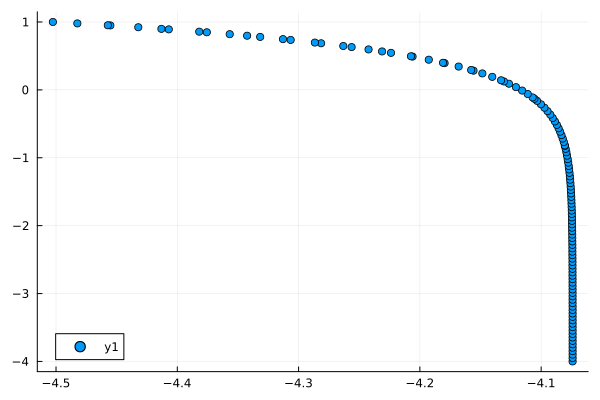

In [6]:
using Plots
scatter(log10.(xs),log10.(ys))

In [15]:
@show poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
t = Turtles(max(poses...))
inds = bisearch(t, m)
ys = [m.xaxis(inds[1])]
xs = [m.yaxis(inds[2])]
println((xs[1], ys[1]))
while nothing != next!(t, m)
    inds = bisearch(t, m)
    push!(ys,m.xaxis(inds[1]))
    push!(xs,m.yaxis(inds[2]))
end

poses = findfirstseed!(m, map((x->begin
                    #= l:\Sieg\Doc\Code\julia\SpectraShooter.jl\deploy.ipynb:1 =#
                    x + CartesianIndex(0, 1)
                end), poses)...) = (CartesianIndex(1, 173), CartesianIndex(1, 174))


(0.00021751204673238058, 0.0001)


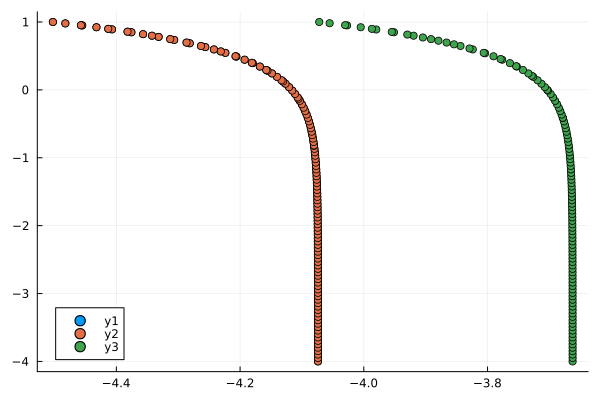

In [16]:
using Plots
scatter!(log10.(xs),log10.(ys))

In [17]:
@show poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
t = Turtles(max(poses...))
inds = bisearch(t, m)
ys = [m.xaxis(inds[1])]
xs = [m.yaxis(inds[2])]
println((xs[1], ys[1]))
while nothing != next!(t, m)
    inds = bisearch(t, m)
    push!(ys,m.xaxis(inds[1]))
    push!(xs,m.yaxis(inds[2]))
end

poses = findfirstseed!(m, map((x->begin
                    #= l:\Sieg\Doc\Code\julia\SpectraShooter.jl\deploy.ipynb:1 =#
                    x + CartesianIndex(0, 1)
                end), poses)...) = (CartesianIndex(1, 180), CartesianIndex(1, 181))


(0.0003266252392798774, 0.0001)


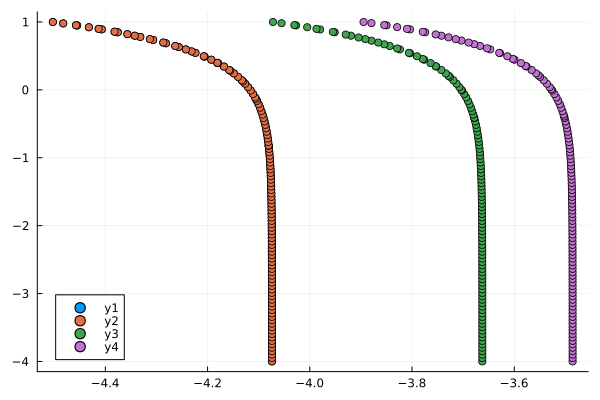

In [18]:
using Plots
scatter!(log10.(xs),log10.(ys))